数据清洗， 合并csv

In [638]:
# import pandas as pd
# import glob

# file_list = glob.glob("*.csv")
# combined_data = pd.DataFrame()

# for file in file_list:
#     data = pd.read_csv(file)
#     combined_data = pd.concat([combined_data, data], ignore_index=True)

# combined_data.to_csv("combined_data.csv", index=False)



查看数据,csv格式有问题,改变格式

In [639]:
# import csv

# with open('combined_data.csv', 'r', newline='') as input_file:
#     reader = csv.reader(input_file, delimiter=';')
#     data = list(reader)

# with open('combined_data_new.csv', 'w', newline='') as output_file:
#     writer = csv.writer(output_file)
#     for row in data:
#         new_row = []
#         date_values = row[0].strip('""').split(';')
#         new_row.extend(date_values)
#         new_row.extend(row[1:])
#         writer.writerow(new_row)




查看数据

In [640]:
import pandas as pd 


df_usdt = pd.read_csv('USDT_data_new.csv', header=0)



In [641]:
df_usdt.head()

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2018-12-30T00:00:00.000Z,"""2018-12-30T23:59:59.999Z""","""2018-12-30T00:17:06.000Z""","""2018-12-30T19:47:04.000Z""",1.030514,1.035273,1.016393,1.019086,3.762583e+09,1.893630e+09,"""2018-12-30T23:59:59.999Z"
1,2018-12-29T00:00:00.000Z,"""2018-12-29T23:59:59.999Z""","""2018-12-29T23:48:00.000Z""","""2018-12-29T21:19:02.000Z""",1.023953,1.048695,1.015617,1.031473,4.372940e+09,1.916646e+09,"""2018-12-29T23:59:59.999Z"
2,2018-12-28T00:00:00.000Z,"""2018-12-28T23:59:59.999Z""","""2018-12-28T22:34:02.000Z""","""2018-12-28T15:39:03.000Z""",1.022574,1.032146,0.997092,1.023160,4.639998e+09,1.901201e+09,"""2018-12-28T23:59:59.999Z"
3,2018-12-27T00:00:00.000Z,"""2018-12-27T23:59:59.999Z""","""2018-12-27T19:09:02.000Z""","""2018-12-27T11:58:01.000Z""",1.023169,1.043492,1.015800,1.024174,3.977541e+09,1.901299e+09,"""2018-12-27T23:59:59.999Z"
4,2018-12-26T00:00:00.000Z,"""2018-12-26T23:59:59.999Z""","""2018-12-26T14:44:07.000Z""","""2018-12-26T19:08:02.000Z""",1.021943,1.032330,1.011707,1.019550,4.461185e+09,1.892714e+09,"""2018-12-26T23:59:59.999Z"


In [642]:
df_usdt.isnull().sum()

timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64

In [643]:
df_usdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   2093 non-null   object 
 1   timeClose  2093 non-null   object 
 2   timeHigh   2093 non-null   object 
 3   timeLow    2093 non-null   object 
 4   open       2093 non-null   float64
 5   high       2093 non-null   float64
 6   low        2093 non-null   float64
 7   close      2093 non-null   float64
 8   volume     2093 non-null   float64
 9   marketCap  2093 non-null   float64
 10  timestamp  2093 non-null   object 
dtypes: float64(6), object(5)
memory usage: 180.0+ KB


数据清洗，去掉不需要的列，转换时间

In [644]:
df_usdt.drop(["timeOpen","timeHigh","timeLow","timeClose"], axis=1, inplace=True)
df_usdt['timestamp'] = df_usdt['timestamp'].str.split('T').str[0]
df_usdt['timestamp'] = df_usdt['timestamp'].str.strip('"')
df_usdt["timestamp"] = pd.to_datetime(df_usdt["timestamp"])
df_usdt = df_usdt.rename(columns={'timestamp': 'date'})

df_usdt.sort_values(by='date', inplace=True)

df_usdt.head()

,open,high,low,close,volume,marketCap,date
363,1.01255,1.01536,1.001530,1.007280,1.685300e+09,1.378050e+09,2018-01-01
362,1.00574,1.00988,0.993250,1.004900,2.635860e+09,1.374793e+09,2018-01-02
361,1.00660,1.02328,1.002640,1.013440,2.471690e+09,1.386477e+09,2018-01-03
360,1.01320,1.01618,0.993822,1.002530,3.200130e+09,1.471804e+09,2018-01-04
359,1.00175,1.00501,0.985915,0.998634,3.096620e+09,1.466084e+09,2018-01-05


查看2018年至今close的走势图

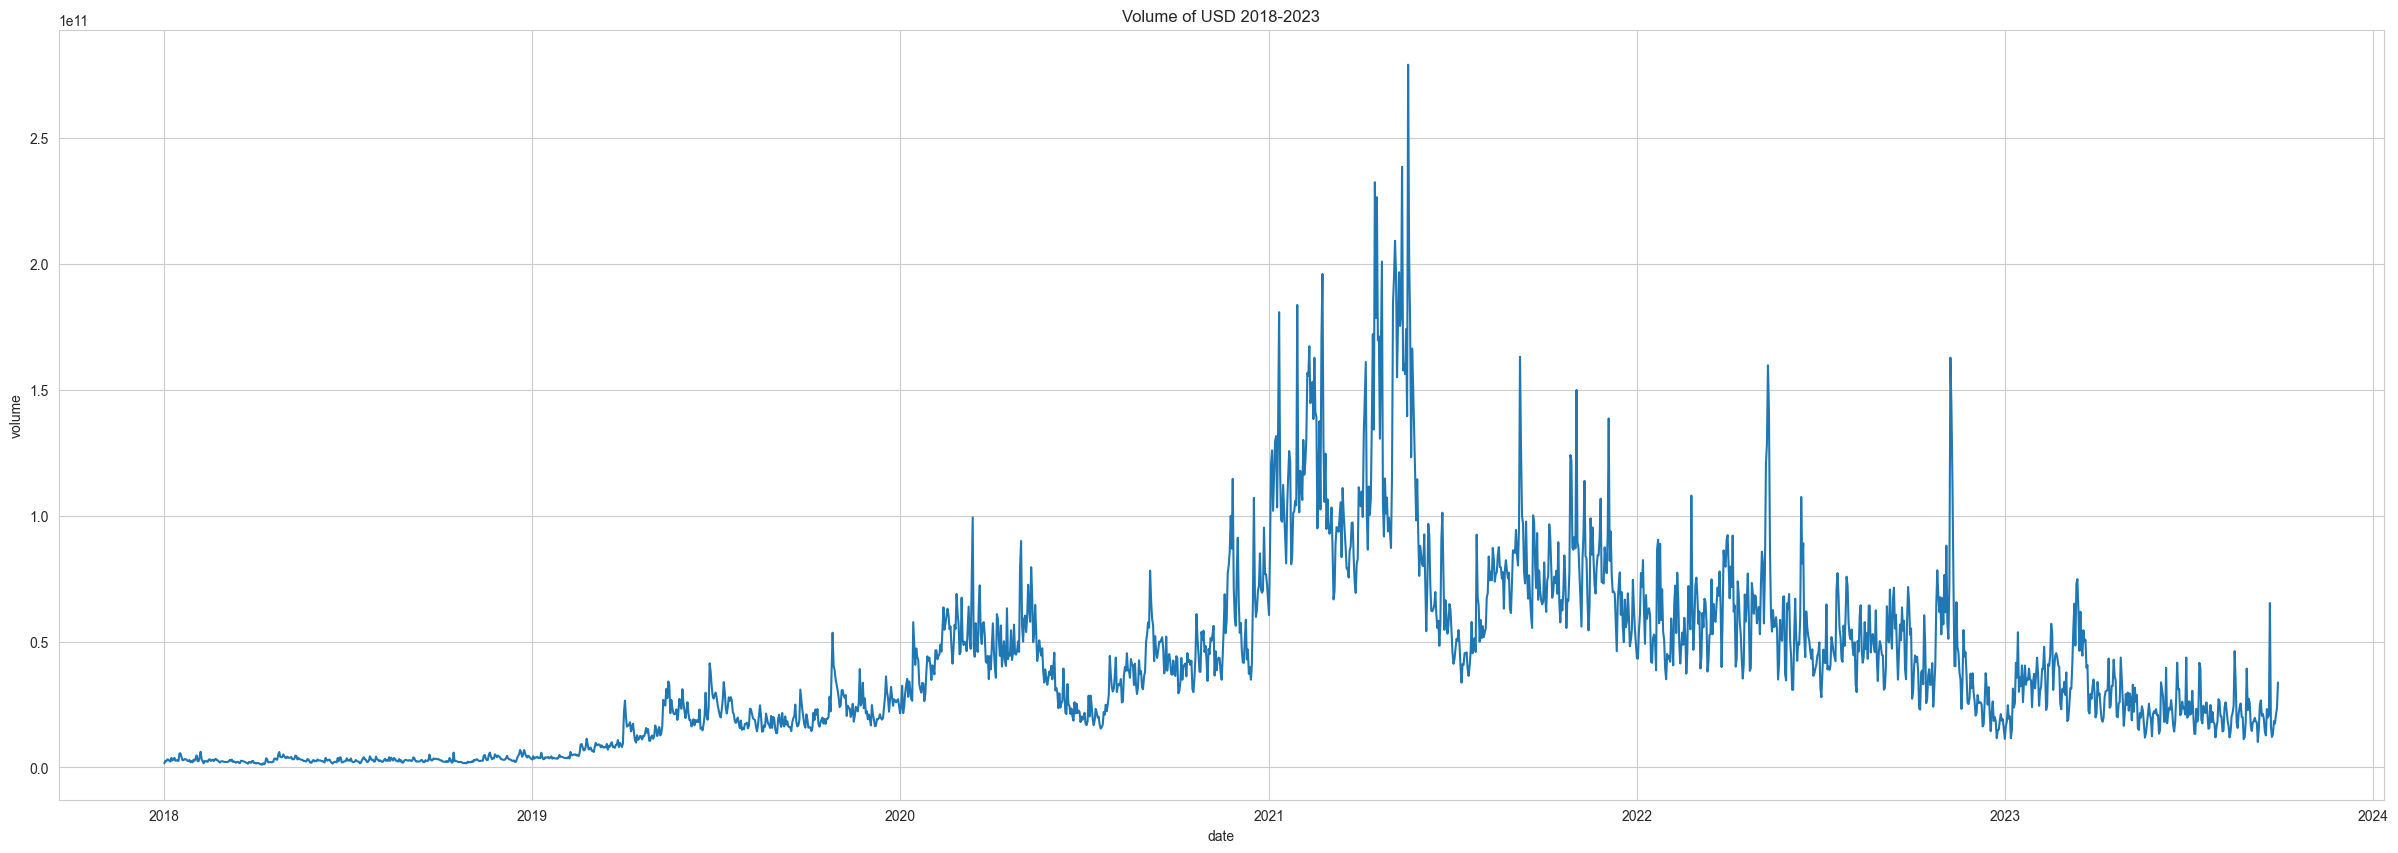

In [645]:
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import seaborn as sns
import warnings
import matplotlib.dates as mpl_dates


tmp_df = df_usdt.groupby(["date"])["volume"].sum().reset_index()
plt.figure(figsize=(30,10))
sns.lineplot(data=tmp_df, x="date", y="volume")
plt.title('Volume of USD 2018-2023')
plt.show()

添加一个新的列，计算日回报率

In [646]:

df_usdt['returns'] = ((df_usdt.close-df_usdt.open)/df_usdt.open)* 100
df_usdt.head()

,open,high,low,close,volume,marketCap,date,returns
363,1.01255,1.01536,1.001530,1.007280,1.685300e+09,1.378050e+09,2018-01-01,-0.520469
362,1.00574,1.00988,0.993250,1.004900,2.635860e+09,1.374793e+09,2018-01-02,-0.083527
361,1.00660,1.02328,1.002640,1.013440,2.471690e+09,1.386477e+09,2018-01-03,0.679514
360,1.01320,1.01618,0.993822,1.002530,3.200130e+09,1.471804e+09,2018-01-04,-1.053106
359,1.00175,1.00501,0.985915,0.998634,3.096620e+09,1.466084e+09,2018-01-05,-0.311057


日回报率的表格（添加公式）

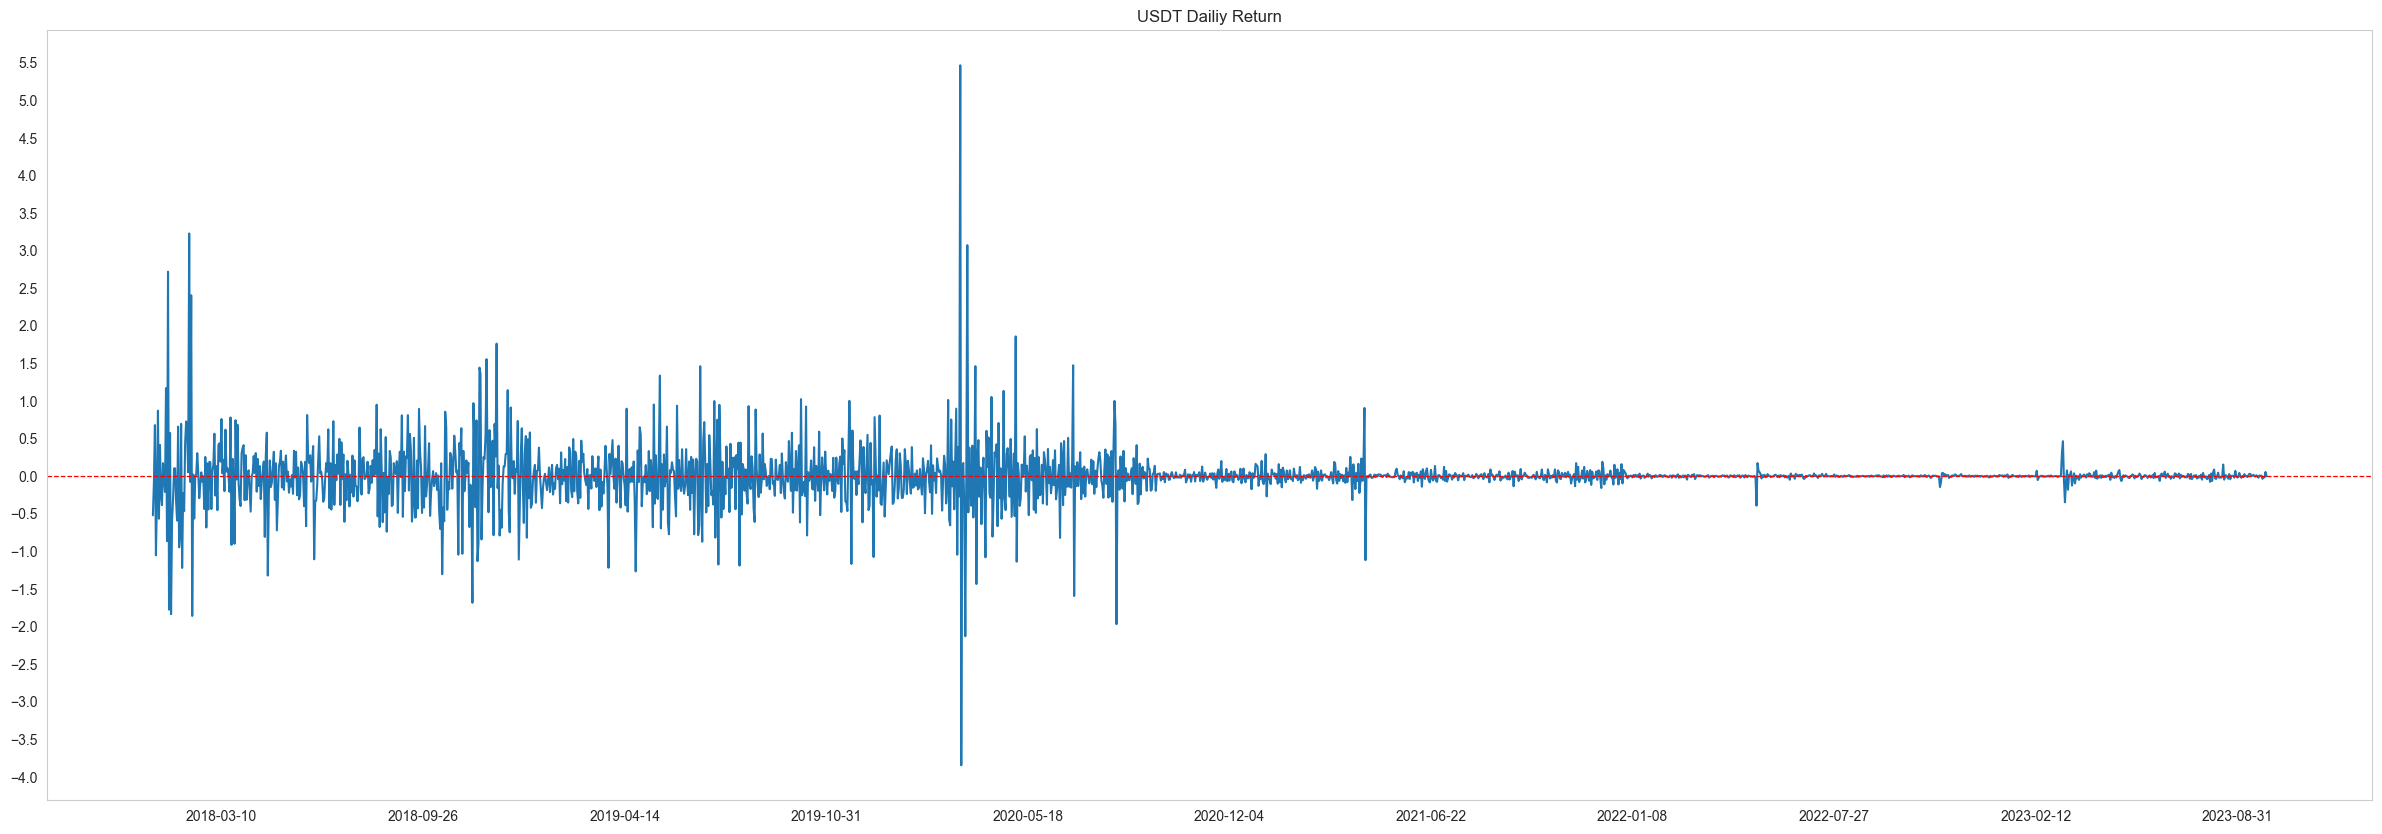

In [647]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df_usdt['date'], df_usdt['returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(12))  
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5)) 
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.9)
plt.title('USDT Dailiy Return')
plt.grid()
plt.show()


月回报率表格

In [648]:
grouped = df_usdt.groupby([df_usdt.date.dt.year, df_usdt.date.dt.month])
monthly_returns = grouped.last().close / grouped.first().open * 100 - 100
monthly_returns.index.names = ['Year', 'Month']
monthly_returns = monthly_returns.to_frame()
monthly_returns.reset_index(inplace=True)
monthly_returns.columns = ['Year', 'Month', 'Monthly_returns']
monthly_returns.head()

,Year,Month,Monthly_returns
0,2018,1,-2.199989
1,2018,2,0.740750
2,2018,3,0.092312
3,2018,4,0.323087
4,2018,5,-0.224641


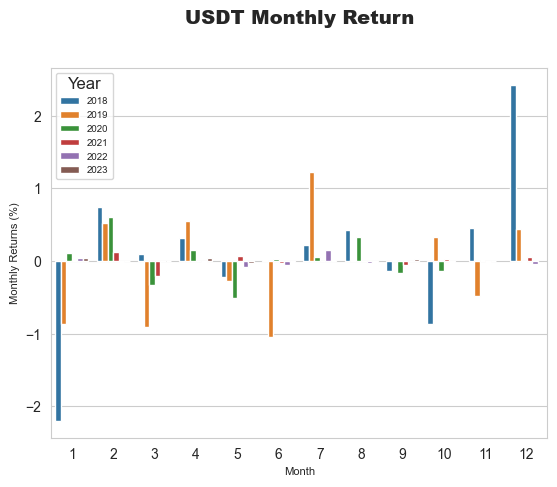

In [649]:
ax = sns.barplot(x='Month', y='Monthly_returns', hue='Year', data=monthly_returns,)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax.set_ylabel('Monthly Returns (%)', fontsize=8)
ax.set_xlabel('Month', fontsize=8)

ax.legend(title='Year', title_fontsize=12, fontsize=7, loc='upper left')
ax = plt.title('USDT Monthly Return', fontsize=14, loc='center', fontweight='heavy', pad=32)

年回报率

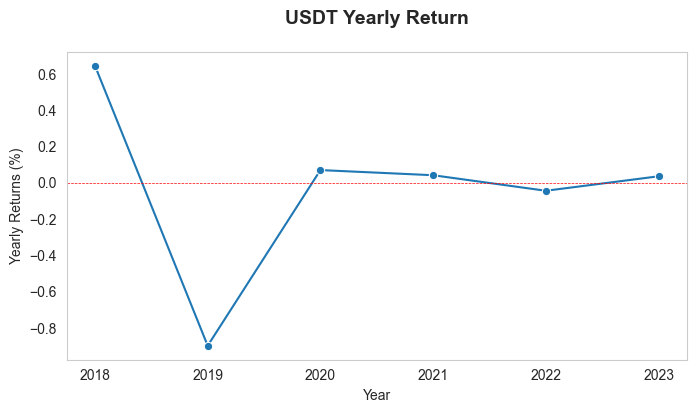

In [650]:
warnings.filterwarnings("ignore")  

yearly_returns = df_usdt.groupby(df_usdt.date.dt.year).last().close / df_usdt.groupby(df_usdt.date.dt.year).first().open * 100 - 100
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x=yearly_returns.index, y=yearly_returns.values, palette="Blues", marker='o')
ax.set_title('USDT Yearly Return', fontsize=14, fontweight='bold', pad=20)
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Yearly Returns (%)', fontsize=10)
plt.xticks(rotation=0)
plt.grid()
plt.show()

划分训练集和测试级 20%的比例

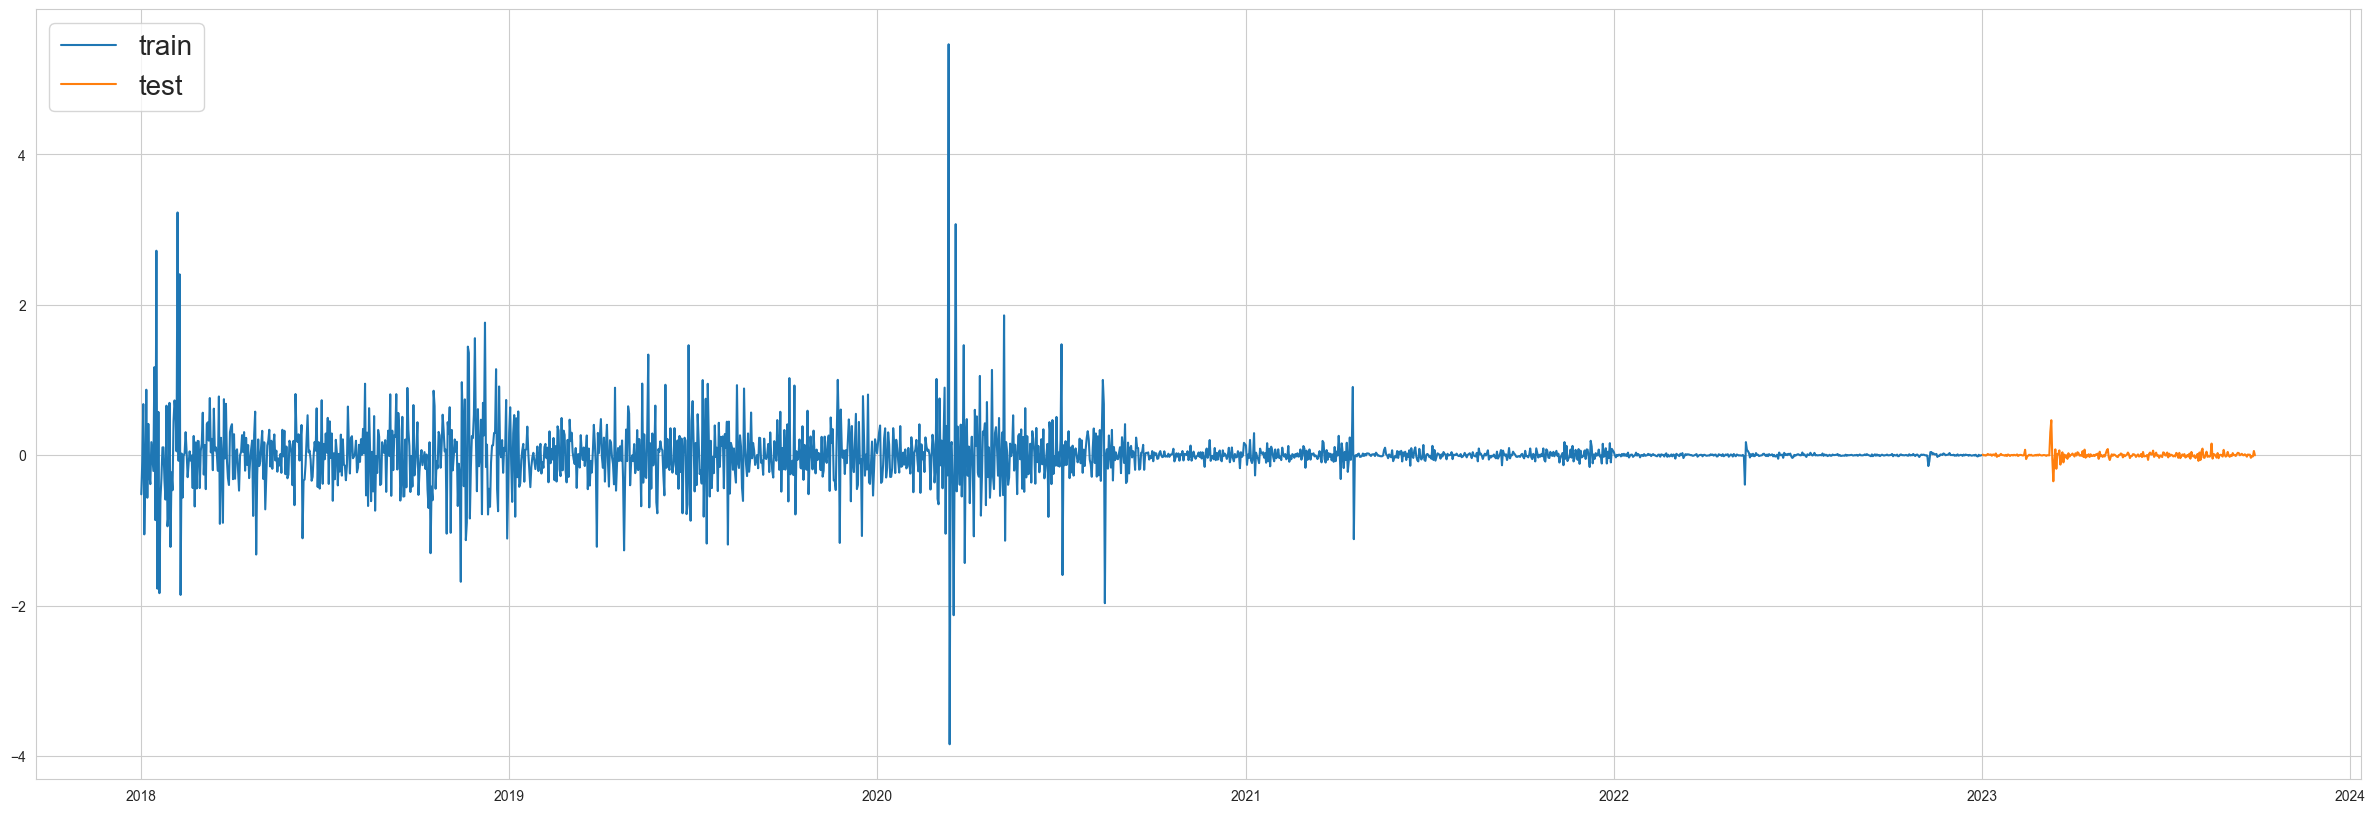

In [659]:

df_train = df_usdt[df_usdt['date'] <= '2023-01'][['returns', 'date']].set_index('date')
df_test = df_usdt[df_usdt['date'] > '2023-01'][['returns', 'date']].set_index('date')
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df_train, label='train')
ax.plot(df_test, label='test')
plt.legend(['train', 'test'],title_fontsize=12, fontsize=20, loc='upper left')


In [652]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import random

seed_value = 52
torch.manual_seed(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

In [660]:


train_size = int(len(df_usdt) * 0.70)
train, rest = df_usdt[:train_size], df_usdt[train_size:]
validation_size = int(len(rest) * 0.50)
validation, test = rest[:validation_size], rest[validation_size:]

print(len(train))
print(len(validation))
print(len(test))

1465
314
314
